In [12]:
import numpy as np
import pandas as pd
import os
import cv2

In [13]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [14]:
zipfile_path = '/content/drive/MyDrive/Colab Notebooks/dataset/kraggle_maths_symbols.zip'#'/content/drive/MyDrive/Colab Notebooks/dataset/'

In [15]:
import zipfile

In [16]:
#prepare a directory structure from the zipfile
folders_dict = dict()
with zipfile.ZipFile(zipfile_path,'r') as zip_f:
    for elem in zip_f.namelist():
        if elem.endswith('/'):
            if elem not in folders_dict:
              folders_dict[elem]=list()
    for elem in zip_f.namelist():
        if not elem.endswith('/'):
            a = elem.rsplit('/',1)
            folders_dict[a[0]+'/'].append(a[1])
            # print('{} : {}'.format(a[0]+'/',a[1]))

print('{} folders.'.format(len(folders_dict)))

82 folders.


In [17]:
folders_sizes = [len(folders_dict[key]) for key in folders_dict ]
labels = [s.split('/')[-2] for s in folders_dict]

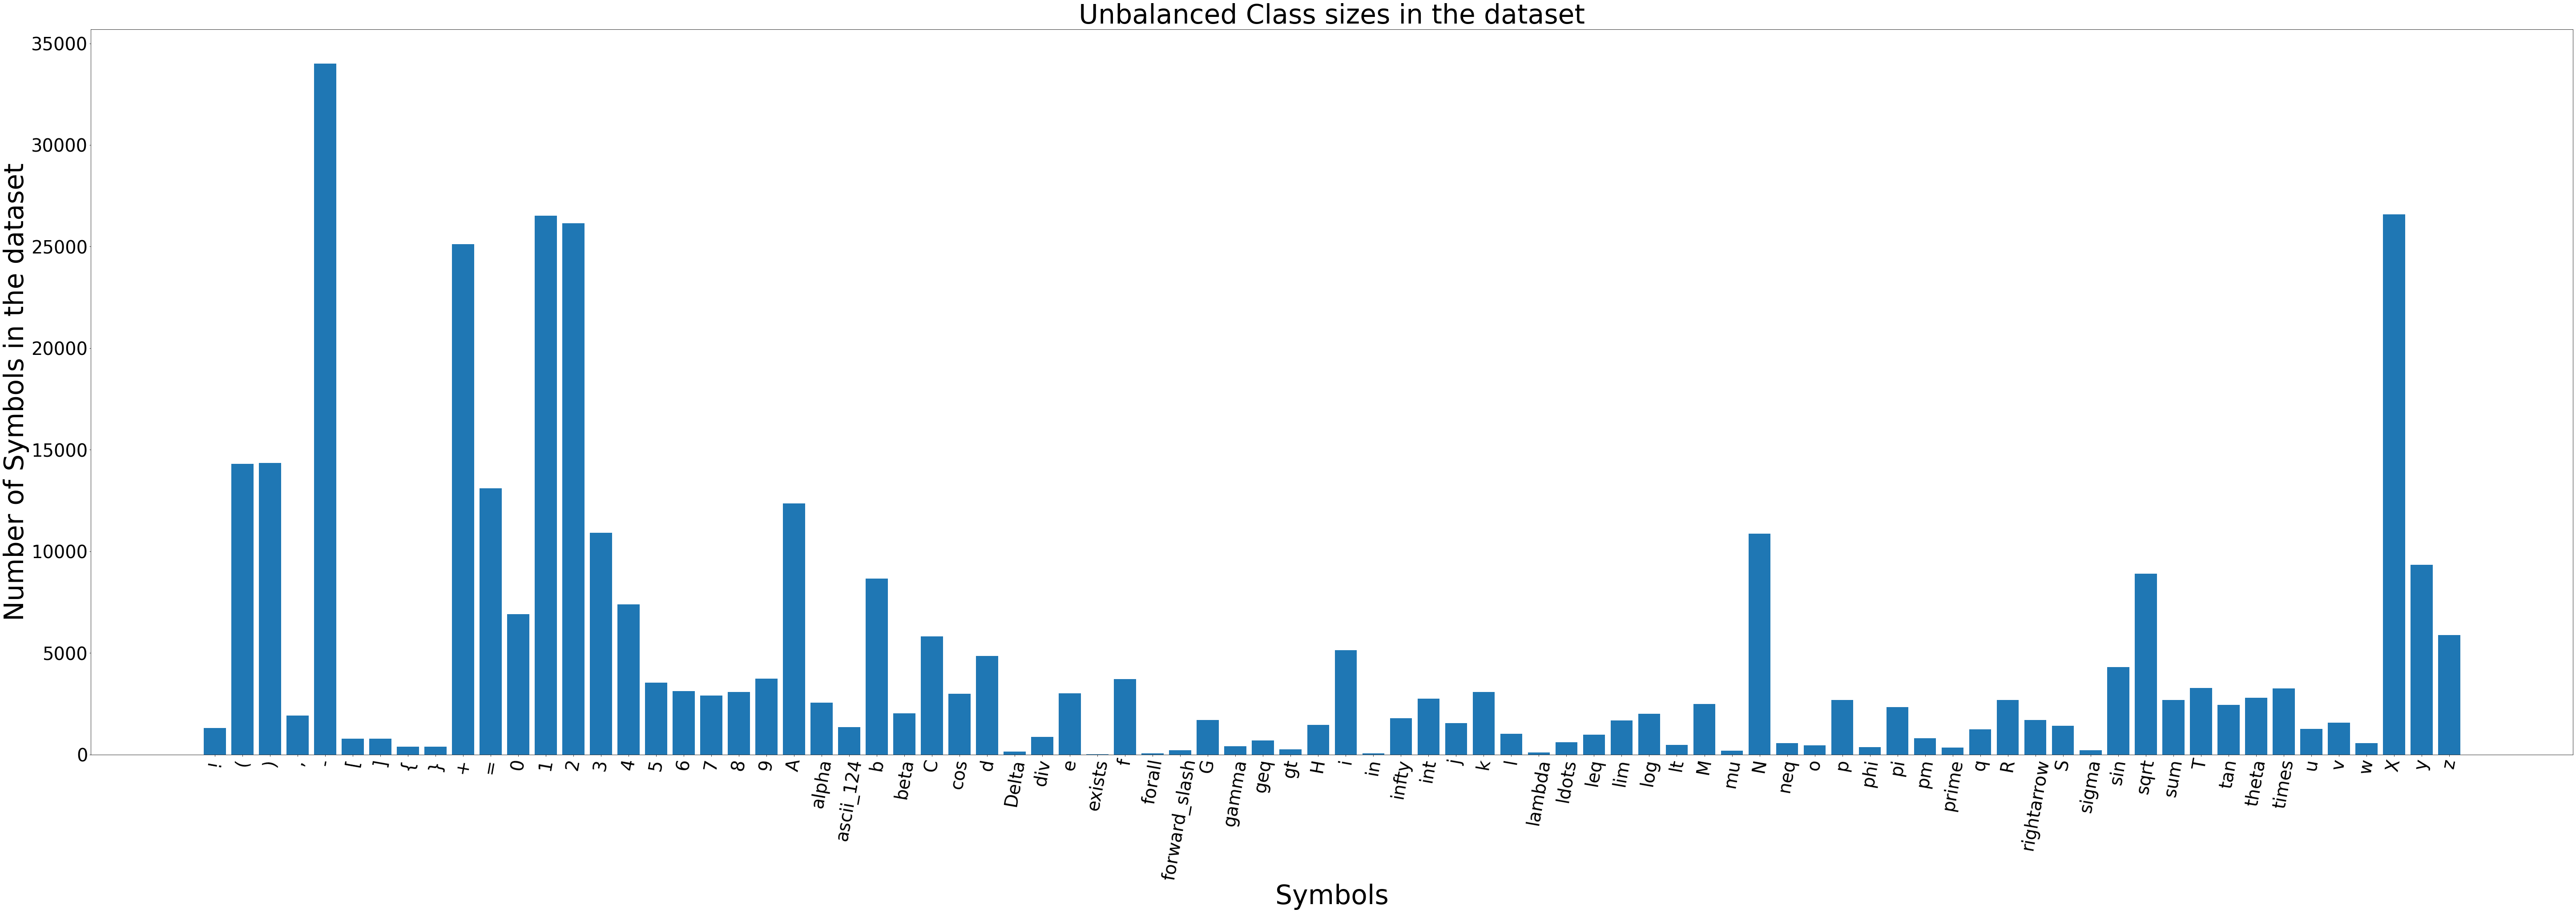

In [140]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,30 ))

plt.xticks(rotation=80,fontsize=40)
plt.yticks(fontsize=40)
plt.title('Unbalanced Class sizes in the dataset', fontsize=60)
fig = plt.bar(range(len(folders_sizes)),folders_sizes,tick_label=labels)
plt.xlabel('Symbols', fontsize=60)
plt.ylabel('Number of Symbols in the dataset', fontsize=60)

resolution_value = 120
plt.savefig("/content/drive/MyDrive/Colab Notebooks/dataset.png", format="png", dpi=resolution_value)
plt.show()

In [19]:
# repeat_times = dict()
# for k in folders_sizes():
#   pass

In [20]:
#Make a N*785*1 dataframe from all images in 'folder' 
#without extracting zipfile
path_folders = 'kraggle_maths_symbols/'
def load_images2(folder):
    train_data = np.empty((0,784,1))
    folder_path = path_folders+folder+'/'
    try:
        subDirs = folders_dict[folder_path]#os.listdir(folder)    #folders_dict is defined in previous cell
    except KeyError:#FileNotFoundError
        print(f"{folder} doesn't exist, continuing with next one...")
        return None
        
    files_count = 0
    with zipfile.ZipFile(zipfile_path, 'r') as zip_f:
      for filename in subDirs:
          #img=cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
          img = None
          file_path = folder_path+filename
          
          img_np_array=np.frombuffer(zip_f.read(file_path),np.uint8)
          img = cv2.imdecode(img_np_array,cv2.IMREAD_GRAYSCALE)
          
          
          if img is not None:
              height, width = img.shape
              #image.copyTo(img2)
              img=~img
              _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
              ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)          
              cnt=sorted(ctrs,key=lambda ctr:cv2.boundingRect(ctr)[0])
              #input()
              #disp_contours(cnt,width, height)
              w=int(28)
              h=int(28)
              maxi=0
              for c in cnt:
                  x,y,w,h=cv2.boundingRect(c)
                  maxi=max(w*h,maxi)
                  if(maxi==w*h):
                      x_max=x
                      y_max=y
                      h_max=h
                      w_max=w
              im_crop=thresh[y_max:y_max+h_max+10,x_max:x_max+w_max+10]
              im_resize=cv2.resize(im_crop,(28,28))
              im_resize=np.reshape(im_resize,(1,784,1))
              train_data=np.append(train_data,im_resize,axis=0)
              files_count = files_count+1
              if files_count % 10**4 == 0:
                print("{} files processed...".format(files_count))
              #print(train_data.shape)
    return train_data

In [21]:
labels_symbols=dict()
for i in range(0,10):
    labels_symbols[i] = chr(48+i)
labels_symbols .update( {
    10:'-', 11:'+', 12:'*', 13:'=', 14:'A', 15:'b', 16:'<', 17:'>', 18:'/',19:'√', 20:'(',21:')'
})
symbols_folder = {'*':'times','/':'forward_slash','<':'lt','>':'gt','√':'sqrt'}#'(':'',')':''}

labels_symbols2 = {22:'C',23:'X',24:'y',25:'z',26:'alpha',27:'beta',
                  28:'gamma',29:'lambda',30:'Delta',31:'sigma',32:'theta', 33:'phi',34:'mu', 35:'N', 36:'u', 37:'v'}

labels_symbols.update(labels_symbols2)

labels_symbols3 = {38:'[',39:']',40:'{',41:'}',42:'div'}

# labels_symbols.update(labels_symbols3)

labels_symbols4 = {43:'lim',44:'rightarrow',45:'sin',46:'cos',47:'tan',48:'sum',49:'int'}

labels_symbols.update(labels_symbols4)

exclude_symbols = []

In [22]:
with zipfile.ZipFile(zipfile_path,'r') as zip_f:
  zip_f.extractall('/content/')

In [23]:
def load_images(folder):
    train_data = np.empty((0,784,1))
    try:
        subDirs = os.listdir(folder)
    except FileNotFoundError:
        print(f"{folder} doesn't exist, continuing with next one...")
        return None
        
    files_count = 0
    for filename in subDirs:
        img=cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        
        height, width = img.shape
        #image.copyTo(img2)
        img=~img
        if img is not None:
            _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)          
            cnt=sorted(ctrs,key=lambda ctr:cv2.boundingRect(ctr)[0])
            #input()
            #disp_contours(cnt,width, height)
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if(maxi==w*h):
                    x_max=x
                    y_max=y
                    h_max=h
                    w_max=w
            im_crop=thresh[y_max:y_max+h_max+10,x_max:x_max+w_max+10]
            im_resize=cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(1,784,1))
            train_data=np.append(train_data,im_resize,axis=0)
            #print(train_data.shape)
            files_count = files_count+1
            if files_count % 10**4 == 0:
              print("{} files processed...".format(files_count))
    return train_data

In [90]:
########## getting accuracy for each symbol

In [29]:
###
import keras
modelI=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model2OvSampled.keras')

In [38]:
symbols = [folder.split('/')[-2] for folder in folders_dict]
conf_mat_dict = dict()
for symbol in symbols:
  conf_mat_dict[symbol] = dict()
  for sym2 in symbols:
    conf_mat_dict[symbol][sym2]=0

In [95]:
import pickle
label_indices=None
with open('/content/drive/MyDrive/Colab Notebooks/dataset/label_indices_now.pickle','rb') as file:
    label_indices = pickle.load(file)

type(label_indices)

dict

In [142]:
def get_prediction(modelI,data):
  prediction_scores = modelI.predict(data.to_numpy().reshape((1,28,28,1)))[0]
  pred = np.argmax(prediction_scores, axis=0)
  # print(pred)
  return label_indices[pred].split('/')[-2]

import pickle
for symbol in symbols[symbols.index('y'):]:
  symbol_imgs = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/dataset/newtrain_{symbol}.csv").loc[:3000,:]
  print(f"{symbol} data_loaded --> {len(symbol_imgs)}")
  df2 = symbol_imgs.apply(lambda x : get_prediction(modelI,x[:-1]),axis=1)#modelI.predict()
  counts = df2.value_counts()
  for ind in counts.index:
    conf_mat_dict[symbol][ind] = counts[ind]

  with open(f"/content/drive/MyDrive/Colab Notebooks/conf_mat_dict_{symbol}.pickle","wb") as file:
    pickle.dump(conf_mat_dict[symbol],file)

  print(f"{symbol} done --> {len(symbol_imgs)}")


with open("/content/drive/MyDrive/Colab Notebooks/conf_mat_dict.pickle","wb") as file:
  pickle.dump(conf_mat_dict,file)

y data_loaded --> 3001
y done --> 3001
z data_loaded --> 3001
z done --> 3001


In [143]:
train_accuracy=dict()
for k in conf_mat_dict:
  total = np.array(list(conf_mat_dict[k].values())).sum()
  train_accuracy[k] = conf_mat_dict[k][k]*100/total
5
train_accuracy['X']

88.00399866711096

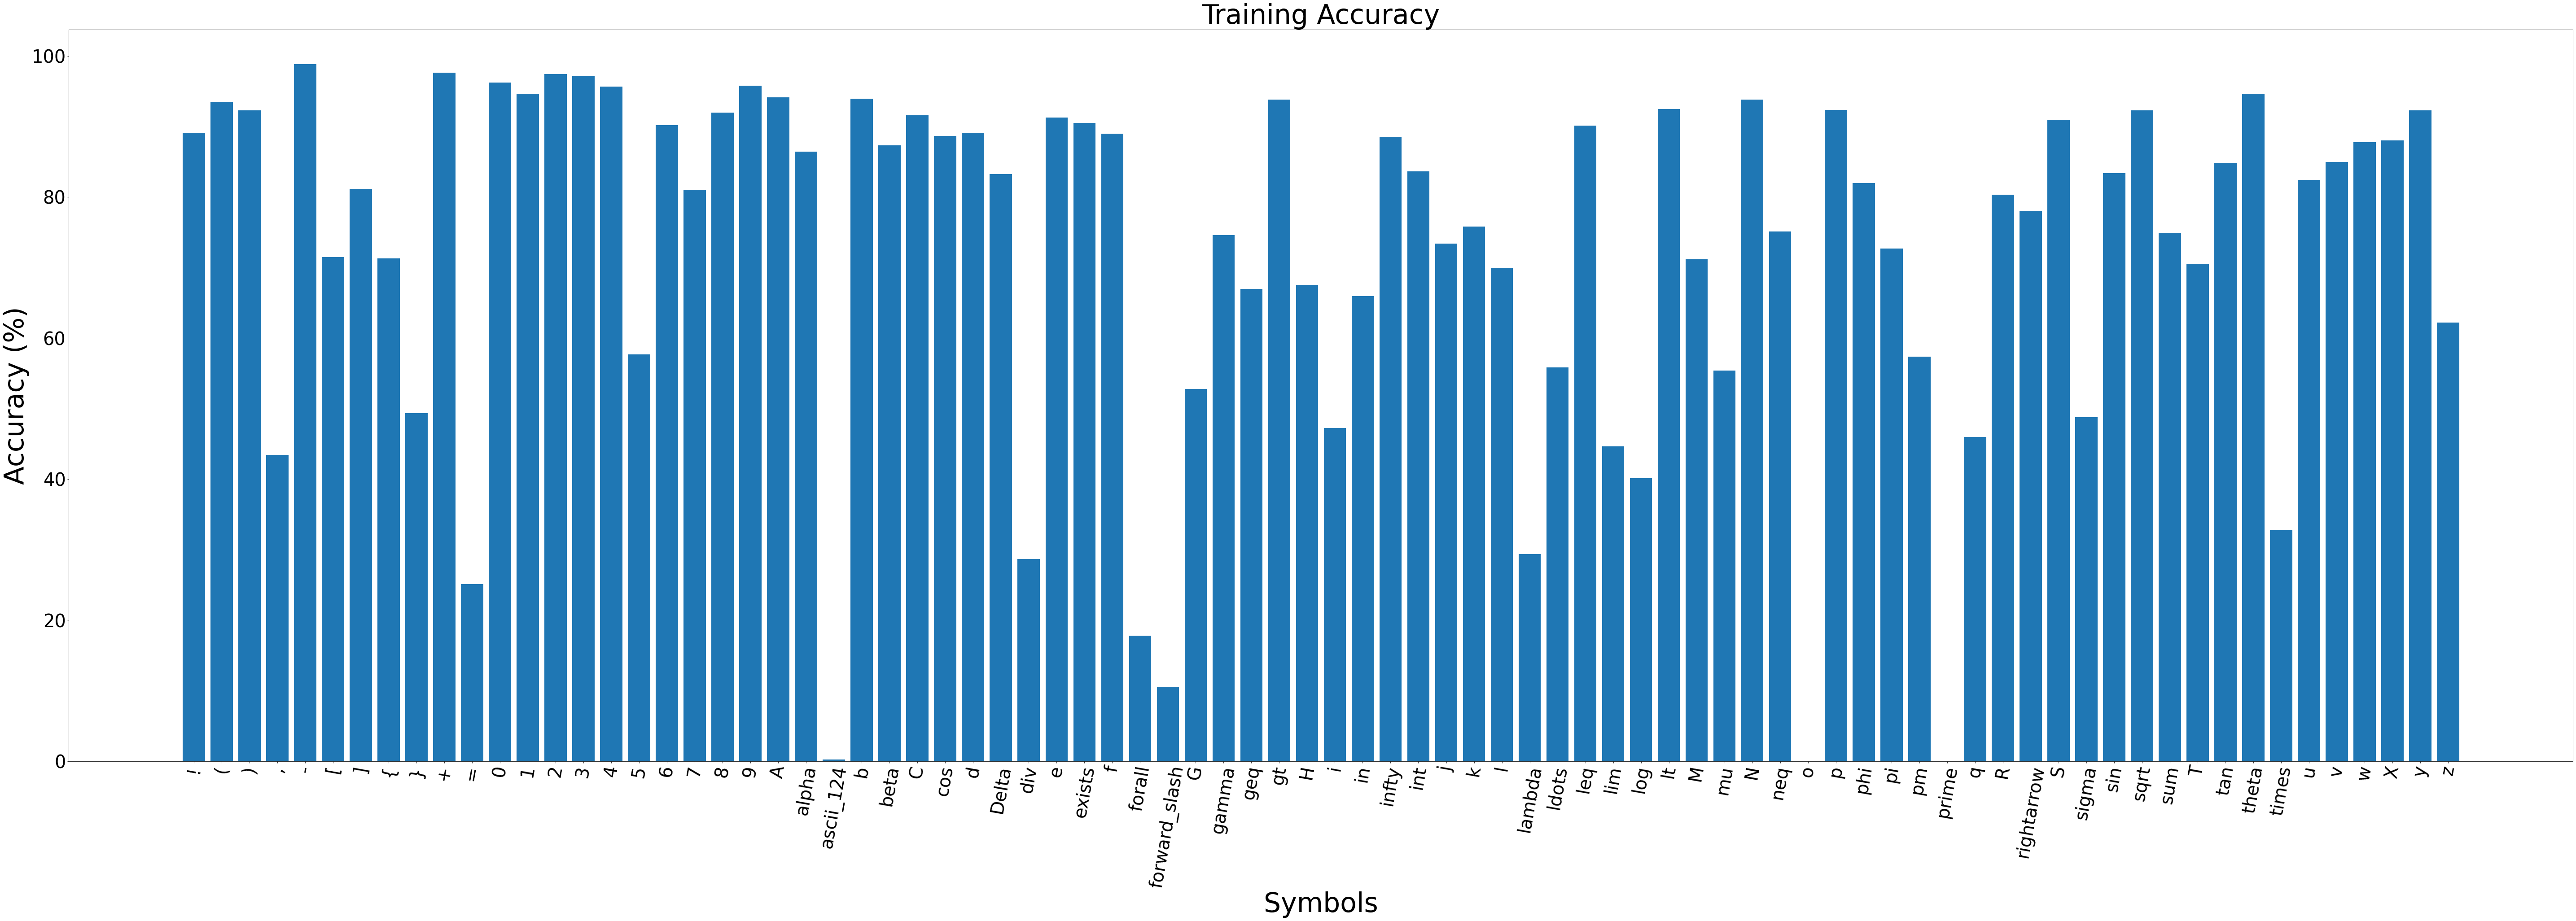

In [144]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,30 ))

plt.xticks(rotation=80,fontsize=40)
plt.yticks(fontsize=40)
plt.title('Training Accuracy', fontsize=60)
plt.xlabel('Symbols', fontsize=60)
plt.ylabel('Accuracy (%)', fontsize=60)
fig = plt.bar(symbols,[train_accuracy[key] for key in symbols])

resolution_value = 120
plt.savefig("/content/drive/MyDrive/Colab Notebooks/train_accuracy.png", format="png", dpi=resolution_value)
plt.show()

In [115]:
for k in conf_mat_dict['(']:
  if conf_mat_dict['('][k]>0:
    print(f"{k}-->",conf_mat_dict['('][k])

(--> 92
1--> 8
C--> 1


In [91]:
len(label_indices)

82

array([[8.47214398e-22, 2.62701726e-18, 5.73452377e-24, 1.04195347e-19,
        1.06859389e-10, 1.58207757e-32, 1.10300124e-20, 9.30356667e-34,
        3.98742995e-32, 4.40740889e-16, 2.31338926e-09, 6.07595742e-01,
        2.49134956e-07, 9.54592251e-05, 3.71470965e-09, 2.08878264e-04,
        2.37483075e-13, 1.08901657e-12, 2.23534507e-11, 1.31374120e-10,
        9.25939763e-04, 3.88711840e-01, 2.70496647e-09, 0.00000000e+00,
        1.44051910e-07, 7.25850654e-14, 3.30735786e-11, 1.14430996e-07,
        9.68484581e-12, 2.47625621e-07, 5.24799223e-35, 4.69380756e-10,
        1.99263512e-20, 4.64637714e-13, 1.34795416e-29, 2.26765465e-34,
        2.96572068e-07, 1.97177607e-17, 4.55651580e-17, 1.52157084e-28,
        2.60726355e-15, 5.44784189e-06, 1.50952181e-14, 8.16404790e-05,
        1.15488051e-15, 5.78833246e-14, 8.56978554e-15, 1.29345612e-12,
        1.32531775e-26, 2.46341677e-24, 1.16231504e-14, 6.18516197e-18,
        2.68112377e-08, 5.15915071e-18, 1.32234479e-09, 6.203998

In [65]:
symbol_imgs.drop(784,inplace=True)

In [ ]:
symbol_imgs.iloc[0][:-1].to_numpy().reshape((28,28))

In [ ]:

df2 = symbol_imgs.apply(lambda x : labels_symbols[modelI.predict(x[:-1].reshape(28,28))],axis=1)#modelI.predict()


In [ ]:

for folder in folders_dict:
  print(folder)

In [ ]:
import pickle

label_indices_now = dict()
for k,key in enumerate(folders_dict):
  label_indices_now[k] = key

# with open('/content/drive/MyDrive/Colab Notebooks/dataset/label_indices_now.pickle','wb') as file:
#   pickle.dump(label_indices_now,file) 

In [ ]:
label_indices_now

In [26]:
import time

load_times=dict()
load_prepare_times=dict()

In [27]:



data=np.empty((0,785,1))

for k,path in enumerate(folders_dict):#[10,16,17,20,21,23]:#labels_symbols:
    print(f"{path}")# : {labels_symbols[k]}",end="")
    #folder_name = labels_symbols[k] if labels_symbols[k] not in symbols_folder \
    #                else symbols_folder[labels_symbols[k]]
    folder_name=path
    if not folder_name:
        print("\n")
        continue
    print(" -> Loading ...")
    start_time = time.time()
    data_symb=load_images('/content/'+folder_name)
    folder_name_split = folder_name.split('/')[-2]
    load_times[folder_name_split] = time.time() - start_time
    print("load_time -> ",load_times[folder_name_split])
    print("-> preparing...")
    if data_symb is not None:
        label = np.broadcast_to(np.array([[[k]]]),(data_symb.shape[0],1,1))
        #print(data_symb.shape)
        data_current_symb = np.concatenate(
                [data_symb,label],axis=1
            )
        data=np.append(data,
            data_current_symb,axis=0
        )
        # folder_name = path.split('/')[-2]
        current_symb_csv_name='/content/drive/MyDrive/Colab Notebooks/dataset/newtrain_{}.csv'.format(str(folder_name_split))
        print("writing to ",current_symb_csv_name)
        pd.DataFrame(data_current_symb.squeeze(),index=None).to_csv(current_symb_csv_name,index=False)
        #pd.DataFrame(data.squeeze(),index=None).to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/newtrain_{}.csv'.format(str(k)),index=False)
        load_prepare_times[folder_name_split] = time.time()-start_time
        print(len(data_current_symb),end=" => ")
        print(len(data))
        print(load_prepare_times[folder_name_split]-load_times[folder_name_split],end="=>")
        print(time.time()-start_time)
        print("=========================================================================================================================")
  
#df=pd.DataFrame(data.squeeze(),index=None)
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/newtrain_complete.csv',index=False)

kraggle_maths_symbols/!/
 -> Loading ...
load_time ->  1.7324013710021973
-> preparing...
writing to  /content/drive/MyDrive/Colab Notebooks/dataset/newtrain_!.csv
1300 => 1300
1.5989990234375=>3.3326025009155273
kraggle_maths_symbols/(/
 -> Loading ...
10000 files processed...
load_time ->  208.2394187450409
-> preparing...
writing to  /content/drive/MyDrive/Colab Notebooks/dataset/newtrain_(.csv
14294 => 15594
5.981715440750122=>214.22346711158752
kraggle_maths_symbols/)/
 -> Loading ...
10000 files processed...


KeyboardInterrupt: ignored

In [ ]:
print(data.shape)
df_all = pd.DataFrame(data.squeeze(),index=None)

In [ ]:
df_all.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/newtrain_all_final2.csv',index=False)

In [ ]:
#inplace concatenate
import os
dataframes_path = '/content/drive/MyDrive/Colab Notebooks/dataset/'
dataframes = [file for file in os.listdir(dataframes_path) if '.csv' in file]

combined_dataframe = pd.concat([pd.read_csv(dataframes_path + s,dtype='uint8') for s in dataframes])

combined_dataframe.to_csv('/content/drive/MyDrive/Colab Notebooks/newtrain_complete.csv',index=False)


In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/newtrain_all_final2.csv',dtype='uint8')

In [ ]:
df_all.shape

In [ ]:
#### NOW TRAINING

In [ ]:
df_all = pd.DataFrame(data.squeeze(),index=None,dtype='uint8')

In [ ]:
import pandas as pd
import numpy as np
import pickle

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
#load df_all from a csv file
df_all = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/newtrain_all_final.csv',dtype='uint8')


In [ ]:
labels=df_all['784']
# labels=df_all[[784]]
num_classes = labels.nunique()#38
num_classes

In [ ]:
data_all_np = np.array(df_all.drop(df_all.columns[[784]],axis=1))
# data_all_np = data_all_np.reshape((data_all_np.shape[0],28,28,1))
data_all_np.shape

In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

data_all_np_ovSampled, labels_ovSampled = RandomOverSampler().fit_resample(data_all_np,labels)


# data_all_np_ovSampled, labels_ovSampled = ADASYN(n_jobs=-1).fit_resample(data_all_np,labels)

In [ ]:
del data_all_np

del df_all



In [ ]:
np.unique(labels_ovSampled,return_counts=True)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/dataset/oversampled_data.csv','wb') as file:
  pickle.dump(data_all_np_ovSampled,file)

with open('/content/drive/MyDrive/Colab Notebooks/dataset/oversampled_labels.csv','wb') as file:
  pickle.dump(labels_ovSampled,file)

In [ ]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels_ovSampled,num_classes=num_classes)
num_classes = cat.shape[1]
cat.shape

In [ ]:
cat[33996]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

(375974, 784)

In [ ]:
#load a model

model_path = '/content/drive/MyDrive/Colab Notebooks/modelFinalFinal.keras'   
model = keras.models.load_model(model_path)

In [ ]:
#create a model

model=Sequential()
model.add( Conv2D(30, (5, 5), input_shape=( 28, 28,1), activation='relu') )
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(60, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))#model.add(Dense(64, activation='relu'))data_all_np_ovSampled, labels_ovSampled
# model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
#model.summary()

In [ ]:
data_all_np_ovSampled = data_all_np_ovSampled.reshape((data_all_np_ovSampled.shape[0],28,28,1))

In [ ]:
history = model.fit(data_all_np_ovSampled, cat, batch_size=8, epochs=5, shuffle=True)

Epoch 1/5
348470/348470 [==============================] - 5106s 15ms/step - loss: 0.7877 - accuracy: 0.8057
Epoch 2/5
  7173/348470 [..............................] - ETA: 1:28:21 - loss: 1.7833 - accuracy: 0.6238

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/modelOvSampledBad.keras')

In [ ]:
model.to_json('/content/drive/MyDrive/Colab Notebooks/modelOvSampled.json')

In [ ]:
#draw graph of training accuracies

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["mae"], 
        label="Training MAE")
ax.plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="Validation MAE")
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#weighted mean of weights of two models

In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/'   
models_name = ['modelFinalFinal.keras','modelFinalFinal2.keras']
model, model2 = keras.models.load_model(model_path+models_name[0]), keras.models.load_model(model_path+models_name[1])

In [ ]:
model_weights = model.get_weights()
model2_weights = model2.get_weights()

In [ ]:
weighted_mean_weights = []

def weighted_sum(*elems):
  wts = [10,1]#len(wts) must be equal to len(elems)
  wtd_sum=np.zeros(elems[0].shape)
  #print("Zeros shape : {}".format(wtd_sum.shape))
  sum_wts=0
  for i in range(len(elems)):
    wtd_sum = wtd_sum + wts[i]*np.array(elems[i])
    sum_wts = sum_wts + wts[i]
  return wtd_sum/sum_wts

for Ls in zip(model_weights,model2_weights):
  #Ls is tuple of weights on corresponding layers in the models
  #print(np.array(Ls).shape)
  weighted_mean_weights.append(
      [ weighted_sum(*Ls)]
  )

In [ ]:
import copy

model3 = copy.deepcopy(model)
model3.set_weights(model_weights)
model.save('/content/drive/MyDrive/Colab Notebooks/modelFinalFinal_weighted.keras')

INFO:tensorflow:Assets written to: ram://7ad13fee-592c-4288-9d4c-23c6db34fd43/assets
